### Likelihood for deterministic predictions

This notebook goes through the steps required to calculate the log likelihood for a set of deterministic predictions

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
from torch.distributions import Normal
from scipy.stats import norm

In [4]:
DATA_PATHS = {'WAPDA' : '../../data/norris/enriched_obs/enriched_wapda_obs_norris_ready.pkl',
              'ICIMOD' : '../../data/norris/enriched_obs/enriched_langtang_obs_norris_ready.pkl',
              'SUSHIWAT' : '../../data/norris/enriched_obs/enriched_sushiwat_obs_norris_ready.pkl',
              'COMBINED' : '../../data/norris/enriched_obs/enriched_combined_obs_norris_ready.pkl'}

In [43]:
def log_likelihood(path):

    # read data
    df = pd.read_pickle(path)

    # calculate MSE, which is equal to the variance
    obs = pd.to_numeric(df['Prec'], errors = 'coerce')
    σ_nor = np.sqrt(np.square(df['precip_norris'] - obs).mean())
    
    obs_t = torch.tensor(obs.values)
    sim_t = torch.tensor(df.precip_norris.values)
    
    normal_dist = Normal(sim_t,σ_nor)
    log_lik = -normal_dist.log_prob(obs_t).mean()
    
    print(f'var(nor) = {σ_nor**2:2f}')
    print(f'-loglik_nor = {-log_lik:2f}')

    return log_lik


In [46]:
for key, value in DATA_PATHS.items():
    print(key)
    log_likelihood(value)
    print('\n')

WAPDA
var(nor) = 46.137014
-loglik_nor = -3.334746


ICIMOD
var(nor) = 308.941247
-loglik_nor = -4.285514


SUSHIWAT
var(nor) = 181.290189
-loglik_nor = -4.018988


COMBINED
var(nor) = 162.786477
-loglik_nor = -3.965158




In [47]:
# calculate log likelihood

# loglik_nor = ( \
#              - (len(df)/2 * np.log(2 * np.pi * σ_nor**2)) \
#              - 1 / (2 * σ_nor**2) * (np.square(obs - df['precip_norris'])).sum() \
#          ) \
#          / len(df)

In [ ]:
def loglik_gaussian(obs, sim=df['wrf_bc_prcp'], σ):
    x = ( -(len(sim)/2 * np.log(2 * np.pi * σ**2)) - 1 / (2 * σ**2) * (np.square(obs - sim)).sum()) / len(df)

In [66]:
y = norm.rvs(size=10000000, loc=40, scale=np.sqrt(162.78))

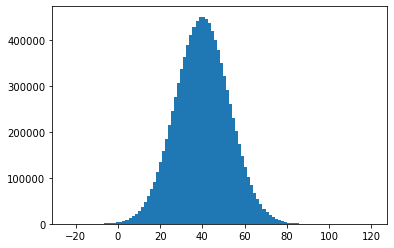

In [67]:
plt.hist(y,bins=100)
plt.show()